**Pressione SHIFT+ENTER para executar a célula**

# Neurônio Artificial

O objetivo deste exercício é a implementação do algoritmo de gradiente descendente / descida de gradiente para regressão linear / treinamento de um neurônio artificial.

Você irá testar os componentes da regressão linear em um toy problem e, dando tudo certo, em um dataset maior ao final.

### Imports das bibliotecas

In [3]:
%matplotlib inline

import numpy as np                        # arrays e matrizes
import matplotlib.pyplot as plt           # plots
import matplotlib.animation as animation  # plots animados
import unittest                           # funcoes de teste

### Predição do neurônio artificial

Vamos supor que cada entrada (input) só tenha uma dimensão, daí o neurônio só tem um peso e implementa uma reta.

Escreva o código abaixo que implemente isso, mapeando a entrada para a predição que o neurônio faria, dados os parâmetros de bias (intercepto) e peso (inclinação).

In [1]:
def predict(input, b, w):
  result = input * w + b
  return result

### Teste da predição

Se nao aparecer nenhuma mensagem, o teste deu certo.

In [4]:
tc = unittest.TestCase()
tc.assertEqual(7, predict(b=1,w=2,input=3))

### Cálculo do MSE

Implemente na célula abaixo o cálculo da função de custo MSE (EQM - Erro Quadrático Médio) para regressão linear.

A equação segue abaixo. N é o número de amostras no dataset, f é a predição e y o valor alvo, i é o índice da i-ésima amostra do dataset.

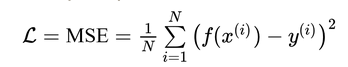

In [6]:
def compute_mse(b, w, data):

    N = len(data)
    total_error = 0
    for i in range(N):
      f = b+w*data[i][0]
      y= data[i][1]
      total_error += (y-f) ** 2

    mse = total_error / N
    """
    Calcula a loss (MSE) do neuronio com determinado peso e bias
    :param b: float - bias (intercepto da reta)
    :param w: float - peso (inclinacao da reta)
    :param data: np.array - matriz com o conjunto de dados, x na coluna 0 e y na coluna 1
    :return: float - o erro quadratico medio
    """
    return mse

### Teste do cálculo do MSE

Se nao aparecer nenhuma mensagem, o teste deu certo.

In [7]:
# teste do MSE
toy_data = np.array([
    [1, 2],
    [2, 4],
    [3, 1],
    [4, 0]
])
tc = unittest.TestCase()

# nesses dados, o MSE pra uma reta com b=1 e w=-1 dá 11.75
tc.assertEqual(11.75, compute_mse(b=1, w=-1, data=toy_data))

### Atualização por descida de gradiente

Implemente um passo da atualização dos parâmetros do neurônio (b,w) a partir do gradiente, composto pelas derivadas parciais do MSE com relação a cada parâmetro.

A função abaixo recebe os parâmetros do neurõnio (b e w), o conjunto de dados (matriz com a entrada na primeira coluna e a saída na segunda coluna) e a taxa de aprendizado. Executa uma atualização por descida do gradiente  e retorna os valores atualizados para b e w.

Lembrete:

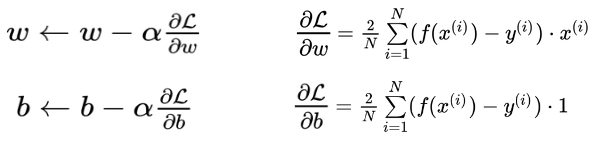




In [20]:
def step_gradient(b, w, data, alpha):
  b_gradient = 0
  w_gradient = 0
  N = len(data)

  for i in range(N):
    x = data[i][0]
    y = data[i][1]

    b_gradient += (2/N) * (predict(x,b,w) - y)
    w_gradient += (2/N) * x * (predict(x,b,w) - y)

  new_b = b - (alpha * b_gradient)
  new_w = w - (alpha * w_gradient)

  return new_b, new_w


    # """
    # Executa uma atualização por descida do gradiente  e retorna os valores atualizados de b e w.
    # :param b: float - bias (intercepto da reta)
    # :param w: float - peso (inclinacao da reta)
    # :param data: np.array - matriz com o conjunto de dados, x na coluna 0 e y na coluna 1
    # :param alpha: float - taxa de aprendizado (a.k.a. tamanho do passo)
    # :return: float,float - os novos valores de b e w, respectivamente
    # """
    # #return 0, 0  # substituir pelo seu codigo

### Teste da atualização

Se nao aparecer nenhuma mensagem, o teste deu certo.

In [21]:
toy_data = np.array([
    [1, 3],
    [2, 4],
    [3, 4],
    [4, 2]
])

tc = unittest.TestCase()

new_b, new_w = step_gradient(1, 1, toy_data, alpha=0.1)
# comparacao de floats com precisao de 11 casas
tc.assertAlmostEqual(0.95, new_b, 11)
tc.assertAlmostEqual(0.55, new_w, 11)

### Regressão linear / treinamento do neurônio

Implemente a função `fit` que faz a regressão linear / treinamento do neurônio. A função recebe o conjunto de dados (matriz com a entrada na primeira coluna e a saída na segunda coluna), os valores iniciais dos parâmetros (b e w), a taxa de aprendizado e o número de épocas/iterações. Para cada época/iteração, executa uma atualização por descida do gradiente e registra os valores atualizados de b e w. Ao final, retorna duas listas, uma com os b e outra com os w obtidos ao longo da execução (o último valor das listas deve corresponder à última época/iteração).

In [22]:
def fit(data, b, w, alpha, num_epochs):
    """
    Para cada época/iteração, executa uma atualização por descida de
    gradiente e registra os valores atualizados de b e w.
    Ao final, retorna duas listas, uma com os b e outra com os w
    obtidos ao longo da execução (o último valor das listas deve
    corresponder à última época/iteração).

    :param data: np.array - matriz com o conjunto de dados, x na coluna 0 e y na coluna 1
    :param b: float - bias (intercepto da reta)
    :param w: float - peso (inclinacao da reta)
    :param alpha: float - taxa de aprendizado (a.k.a. tamanho do passo)
    :param num_epochs: int - numero de épocas/iterações para executar a descida de gradiente
    :return: list,list - uma lista com os b e outra com os w obtidos ao longo da execução
    """
    # inicializa as listas com o valor inicial de cada parametro
    b_history = [b]
    w_history = [w]
    # nao mexa acima

    for _ in range(num_epochs):
      b, w = step_gradient(b, w, data, alpha)
      b_history.append(b)
      w_history.append(w)


      pass # troque pelas atualizacoes de b e w
      # lembre de anexar os valores de b e w às listas

    # nao mexa abaixo
    return b_history, w_history


## Verificando a implementação no dataset maior

A tarefa é predizer o preço de fazendas, a partir de um conjunto de dados fictício. O conjunto é um arquivo com valores separados por vírgula (alegrete.csv), onde a primeira coluna contém a área do terreno, em hectares, e a segunda contém o preço, em milhares de reais.




### Obtenção dos dados

In [23]:
!wget http://inf.ufrgs.br/~artavares/datasets/alegrete.csv

--2024-03-25 20:01:48--  http://inf.ufrgs.br/~artavares/datasets/alegrete.csv
Resolving inf.ufrgs.br (inf.ufrgs.br)... 143.54.11.34
Connecting to inf.ufrgs.br (inf.ufrgs.br)|143.54.11.34|:80... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: http://www.inf.ufrgs.br/~artavares/datasets/alegrete.csv [following]
--2024-03-25 20:01:49--  http://www.inf.ufrgs.br/~artavares/datasets/alegrete.csv
Resolving www.inf.ufrgs.br (www.inf.ufrgs.br)... 143.54.11.34
Reusing existing connection to inf.ufrgs.br:80.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://www.inf.ufrgs.br/~artavares/datasets/alegrete.csv [following]
--2024-03-25 20:01:49--  https://www.inf.ufrgs.br/~artavares/datasets/alegrete.csv
Connecting to www.inf.ufrgs.br (www.inf.ufrgs.br)|143.54.11.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1300 (1.3K) [application/octet-stream]
Saving to: ‘alegrete.csv’

alegrete.csv        100%[=======

### Visualizacao dos dados

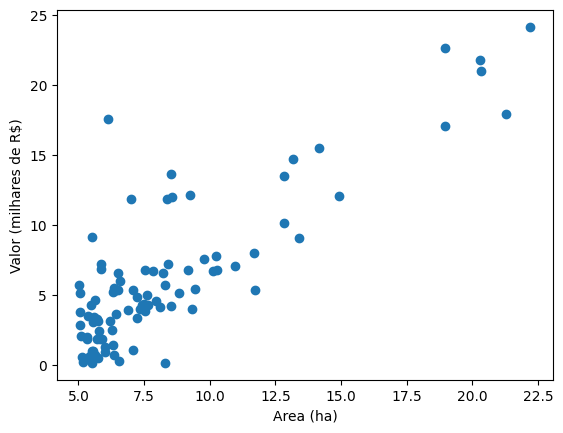

In [25]:
# carregando o dataset como array numpy
dataset = np.genfromtxt('alegrete.csv', delimiter=',')

#Gráfico dos dados
#plt.figure(figsize=(6, 2))
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlabel('Area (ha)')
plt.ylabel('Valor (milhares de R$)')
#plt.title('')
plt.show()

### Execucao da regressao linear

Você pode brincar com os parâmetros iniciais (b,w) e hiperparâmetros (alpha, num_epochs) pra ver o efeito.

In [58]:
b_history, w_history = fit(
    dataset, b=0, w=0,
    alpha=0.0015, num_epochs=8000
)

## Plot da loss ao longo das epocas

EQM final: 8.528124310461784


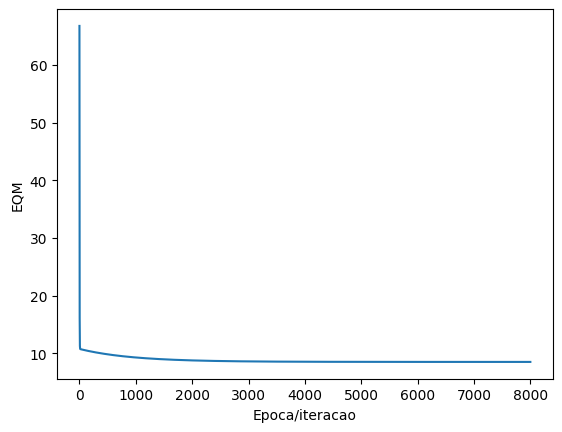

In [59]:
mse_list = [compute_mse(b, w, dataset) for b, w in zip(b_history, w_history)]
print(f"EQM final: {mse_list[-1]}")

plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

Curva encontrada: 1.1558669873834928*x + -3.4020618210487448


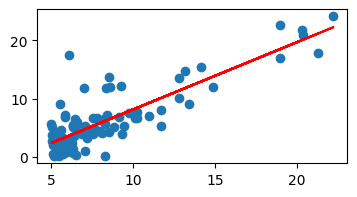

In [60]:
# valores finais de theta0 e theta1
final_b, final_w = b_history[-1], w_history[-1]

#Imprimir parâmetros otimizados
print (f'Curva encontrada: {final_w}*x + {final_b}')

#plota os dados
plt.figure(figsize=(4, 2))
plt.scatter(dataset[:,0], dataset[:,1])

# plota a curva de ajuste
predictions = final_w*dataset[:,0] + final_b
plt.plot(dataset[:,0], predictions, c='r')
plt.show()




### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

<ipython-input-61-931e8fdb7b3e>:20: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=8001.
  ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)


KeyboardInterrupt: 

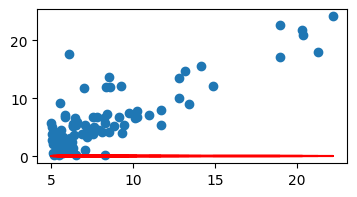

In [61]:
from IPython.display import HTML # para mostrar a animacao

fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

# plota o conjunto de dados
ax.scatter(dataset[:,0], dataset[:,1])

# linha com os valores iniciais dos parametros
pred = w_history[0]*dataset[:,0] + b_history[0]
line, = ax.plot(dataset[:,0], pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = w_history[i] * dataset[:,0] + b_history[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)
HTML(ani.to_jshtml())